In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
ml_df = pd.read_csv('../datasets/movie_lens/ratings.csv.gz')

ml_user_unique_count = ml_df['user_id'].nunique()

print(ml_user_unique_count)
print(ml_df)


162541
          user_id  item_id  rating   timestamp
0               1      296     5.0  1147880044
1               1      306     3.5  1147868817
2               1      307     5.0  1147868828
3               1      665     5.0  1147878820
4               1      899     3.5  1147868510
...           ...      ...     ...         ...
25000090   162541    50872     4.5  1240953372
25000091   162541    55768     2.5  1240951998
25000092   162541    56176     2.0  1240950697
25000093   162541    58559     4.0  1240953434
25000094   162541    63876     5.0  1240952515

[25000095 rows x 4 columns]


In [3]:
kgrec_music_df = pd.read_csv('../datasets/kgrec/music_ratings.csv.gz')

kgrec_unique_user_count = kgrec_music_df['user_id'].nunique()

print(kgrec_unique_user_count)
print(kgrec_music_df)

5199
         user_id  item_id
0           7596       68
1           7596      130
2           7596      330
3           7596      439
4           7596      515
...          ...      ...
751526  50572897     8436
751527  50572897     8453
751528  50572897     8551
751529  50572897     8618
751530  50572897     8619

[751531 rows x 2 columns]


In [4]:
netflix_df = pd.read_csv(f'../datasets/netflix/ratings.csv.gz')

netflix_unique_user_count = netflix_df['user_id'].nunique()

print(netflix_unique_user_count)
print(netflix_df)

480189
           user_id  item_id  rating        date
0                6       30       3  2004-09-15
1                6      157       3  2004-09-15
2                6      173       4  2004-09-15
3                6      175       5  2004-10-10
4                6      191       2  2004-11-24
...            ...      ...     ...         ...
100480502  2649429    17560       5  2002-05-16
100480503  2649429    17580       4  2004-11-28
100480504  2649429    17622       4  2003-02-28
100480505  2649429    17627       3  2003-07-21
100480506  2649429    17692       2  2002-12-07

[100480507 rows x 4 columns]


In [5]:
spotify_df = pd.read_csv(f'../datasets/spotify/ratings.csv.gz')
spotify_df.rename(columns={'playlist_id': 'user_id'}, inplace=True)

spotify_unique_user_count = spotify_df['user_id'].nunique()


print(spotify_unique_user_count)
print(spotify_df)

1000000
          user_id  item_id
0          549000        0
1          549000        1
2          549000        2
3          549000        3
4          549000        4
...           ...      ...
66346423   302999   399233
66346424   302999    11291
66346425   302999    93795
66346426   302999   133087
66346427   302999   133088

[66346428 rows x 2 columns]


---
# Simple statistics

In [6]:
ratings_datasets = [
    ('MovieLens', ml_df),
    ('KGRec', kgrec_music_df),
    ('Netflix', netflix_df),
    ('Spotify', spotify_df),
    ]

datasets_info = {}
# ratings_per_user = {}
# ratings_per_item = {}

for dataset_name, dataset_df in ratings_datasets:
    nunique = dataset_df.nunique()
    datasets_info[dataset_name] = {
        'user_count': nunique['user_id'],
        'item_count': nunique['item_id'],
        'total_number_ratings': dataset_df.shape[0],
        'average_ratings_per_user': dataset_df.groupby('user_id').size().mean(),
        'average_ratings_per_item': dataset_df.groupby('item_id').size().mean(),
        'median_ratings_per_user': dataset_df.groupby('user_id').size().median(),
        'median_ratings_per_item': dataset_df.groupby('item_id').size().median(),
    }

    # ratings_per_user[dataset_name] = dataset_df.groupby('user_id').size()
    # ratings_per_item[dataset_name] = dataset_df.groupby('item_id').size()


datasets_info_df = pd.DataFrame.from_dict(datasets_info, orient='index')

# print(datasets_info_df)

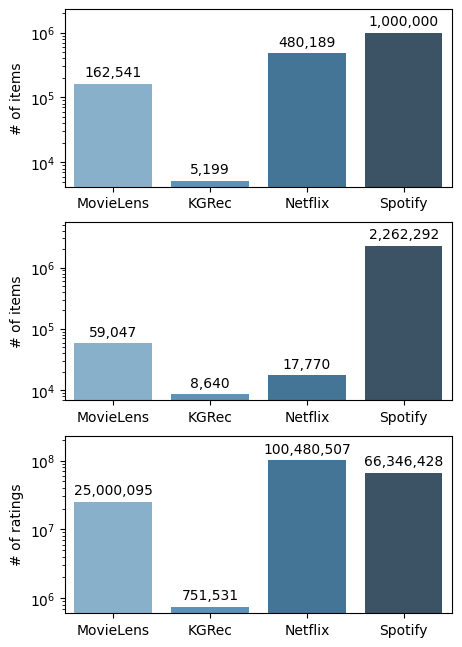

In [7]:
# plot using seaborn
# plot columns in 3 rows plot
fig, axs = plt.subplots(3, 1, figsize=(5, 8), dpi=100)
for i, column in enumerate(datasets_info_df.columns[:3]):
    sns.barplot(ax=axs[i], x=datasets_info_df.index, y=datasets_info_df[column], palette='Blues_d')
    axs[i].set_yscale('log')
    axs[i].bar_label(axs[i].containers[0], padding=3, labels=["{:,}".format(n) for n in datasets_info_df[column]])
    lim_exponent = 1.045 if i == 2 else 1.06
    axs[i].set_ylim(datasets_info_df[column].min() * 0.8, datasets_info_df[column].max() ** lim_exponent)
    # make sure that the labels are not cut off

axs[0].set_ylabel('# of items')
axs[1].set_ylabel('# of items')
axs[2].set_ylabel('# of ratings')
plt.show()
    

In [8]:
# plot using seaborn
# plot columns in 3 rows plot
fig, axs = plt.subplots(3, 1, figsize=(5, 5), dpi=100)
for i, column in enumerate(datasets_info_df.columns[:3]):
    sns.barplot(ax=axs[i], y=datasets_info_df.index, x=datasets_info_df[column], orient='h', palette='Blues_d', dodge=False)
    axs[i].set_xscale('log')
    axs[i].bar_label(axs[i].containers[0], padding=3, labels=["{:,}".format(n) for n in datasets_info_df[column]])
    lim_exponent = 1.07 if i == 2 else 1.08
    axs[i].set_xlim(datasets_info_df[column].min() * 0.8, datasets_info_df[column].max() ** lim_exponent)
    # hide x label
    axs[i].set_xlabel('')    

    # make sure that the labels are not cut off

axs[0].set_title('\# of items')
axs[1].set_title('\# of items')
axs[2].set_title('\# of ratings')

# set compact
plt.tight_layout()
# plt.show()

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.savefig('../figures/datasets_counts.pgf')

<Figure size 432x288 with 0 Axes>

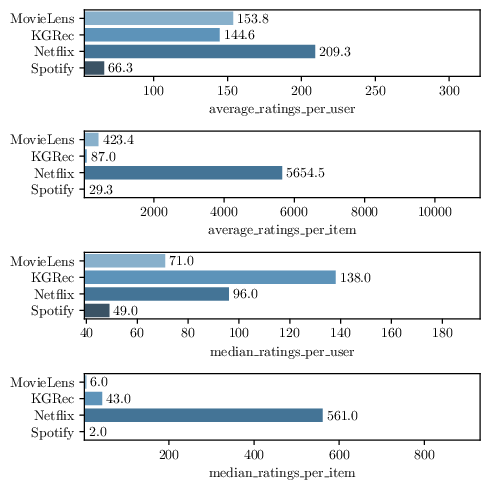

In [9]:
# 'average_ratings_per_user': dataset_df.groupby('user_id').size().mean(),
# 'average_ratings_per_item': dataset_df.groupby('item_id').size().mean(),
# 'median_ratings_per_user': dataset_df.groupby('user_id').size().median(),
# 'median_ratings_per_item': dataset_df.groupby('item_id').size().median(),

columns_to_show = [
    'average_ratings_per_user', 
    'median_ratings_per_user', 
    'average_ratings_per_item', 
    'median_ratings_per_item'
    ]

# plot using seaborn
# plot columns in 3 rows plot
fig, axs = plt.subplots(4, 1, figsize=(5, 5), dpi=100)
for i, column in enumerate(datasets_info_df.columns[3:]):
    sns.barplot(ax=axs[i], y=datasets_info_df.index, x=datasets_info_df[column], orient='h', palette='Blues_d', dodge=False)
    # axs[i].set_xscale('log')
    axs[i].bar_label(axs[i].containers[0], padding=3, labels=['%.1f' % n for n in datasets_info_df[column]])
    lim_exponent = 1.07 if i == 2 else 1.08
    axs[i].set_xlim(datasets_info_df[column].min() * 0.8, datasets_info_df[column].max() ** lim_exponent)
    # hide x label
    axs[i].set_xlabel(column)

    # make sure that the labels are not cut off

# set compact
plt.tight_layout()
# plt.show()

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.savefig('../figures/datasets_counts.pgf')

---
# Ratings distribution statistics

In [12]:
def group_users_by_number_of_ratings(df):
    users_ratings = df.groupby('user_id').agg(
        rating_count=('item_id', 'count'),
    )
    users_ratings.sort_values(by='rating_count', inplace=True)
    users_ratings.reset_index(inplace=True)

    num_users_by_rating = users_ratings.groupby('rating_count').agg(
        num_users=('user_id', 'count'),
    )
    return num_users_by_rating

def group_items_by_number_ratings(df):
    item_ratings = df.groupby('item_id').agg(
        rating_count=('item_id', 'count'),
    )
    item_ratings.sort_values(by='rating_count', inplace=True)
    item_ratings.reset_index(inplace=True)

    num_items_by_rating = item_ratings.groupby('rating_count').agg(
        num_items=('item_id', 'count'),
    )
    return num_items_by_rating

In [13]:
# ratings_datasets = [
#     ('MovieLens', ml_df),
#     ('KGRec', kgrec_music_df),
#     ('Netflix', netflix_df),
#     ('Spotify', spotify_df),
# ]

# datasets_users_by_rating = {}
# datasets_items_by_rating = {}
# datasets_sum = {}

# for dataset_name, dataset in ratings_datasets:
#     num_users_by_rating = group_by_number_of_users_per_rating_count(dataset)
#     num_users_by_rating.reset_index(inplace=True)
#     num_users_by_rating['group_ratings'] = num_users_by_rating['rating_count'] * num_users_by_rating['num_users']
#     num_users_by_rating['num_users_norm'] = num_users_by_rating['num_users'].astype(float) / num_users_by_rating['num_users'].sum().astype(float)
#     num_users_by_rating['rating_count_norm'] = num_users_by_rating['rating_count'].astype(float) / num_users_by_rating['rating_count'].sum().astype(float)
#     num_users_by_rating['group_ratings_norm'] = num_users_by_rating['group_ratings'].astype(float) / num_users_by_rating['group_ratings'].sum().astype(float)
#     num_users_by_rating['mass'] = num_users_by_rating['group_ratings_norm'].cumsum()
#     datasets_sum[dataset_name] = num_users_by_rating.sum()
#     datasets_users_by_rating[dataset_name] = num_users_by_rating


# assert datasets_sum['MovieLens']['num_users'] == ml_user_unique_count
# assert datasets_sum['KGRec']['num_users'] == kgrec_unique_user_count
# assert datasets_sum['Netflix']['num_users'] == netflix_unique_user_count
# assert datasets_sum['Spotify']['num_users'] == spotify_unique_user_count



ratings_datasets = [
    ('MovieLens', ml_df),
    ('KGRec', kgrec_music_df),
    ('Netflix', netflix_df),
    ('Spotify', spotify_df),
]

datasets_users_by_rating = {}
datasets_items_by_rating = {}
datasets_users_sum = {}
datasets_items_sum = {}
for object in ['users', 'items']:
    for dataset_name, dataset in ratings_datasets:
        num_objects_by_rating = group_users_by_number_of_ratings(dataset) if object == 'users' else group_items_by_number_ratings(dataset)

        num_objects_by_rating.reset_index(inplace=True)
        num_objects_by_rating['group_ratings'] = num_objects_by_rating['rating_count'] * num_objects_by_rating[f'num_{object}']
        num_objects_by_rating[f'num_{object}_norm'] = num_objects_by_rating[f'num_{object}'].astype(float) / num_objects_by_rating[f'num_{object}'].sum().astype(float)
        num_objects_by_rating['rating_count_norm'] = num_objects_by_rating['rating_count'].astype(float) / num_objects_by_rating['rating_count'].sum().astype(float)
        num_objects_by_rating['group_ratings_norm'] = num_objects_by_rating['group_ratings'].astype(float) / num_objects_by_rating['group_ratings'].sum().astype(float)
        num_objects_by_rating['mass'] = num_objects_by_rating['group_ratings_norm'].cumsum()
        sum = num_objects_by_rating.sum()

        if object == 'users':
            datasets_users_by_rating[dataset_name] = num_objects_by_rating
            datasets_users_sum[dataset_name] = sum
        else:
            datasets_items_by_rating[dataset_name] = num_objects_by_rating
            datasets_items_sum[dataset_name] = sum

In [14]:
datasets_users_by_rating['MovieLens'].describe()

,rating_count,num_users,group_ratings,num_users_norm,rating_count_norm,group_ratings_norm,mass
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000
mean,1279.890986,76.706465,11798.062765,0.000472,0.000472,0.000472,0.764913
std,1210.688952,284.396936,14120.800764,0.001750,0.000446,0.000565,0.229920
min,20.000000,1.000000,1083.000000,0.000006,0.000007,0.000043,0.003689
25%,549.500000,1.000000,2937.500000,0.000006,0.000203,0.000117,0.672540
50%,1081.000000,5.000000,5694.000000,0.000031,0.000399,0.000228,0.850967
75%,1686.500000,26.000000,14237.500000,0.000160,0.000622,0.000569,0.932618
max,32202.000000,4611.000000,92220.000000,0.028368,0.011874,0.003689,1.000000


In [15]:
datasets_users_by_rating['KGRec'].describe()

,rating_count,num_users,group_ratings,num_users_norm,rating_count_norm,group_ratings_norm,mass
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,200.657143,18.567857,2684.039286,0.003571,0.003571,0.003571,0.620948
std,100.687584,19.402981,2545.374131,0.003732,0.001792,0.003387,0.373840
min,50.000000,1.000000,50.000000,0.000192,0.000890,0.000067,0.000067
25%,121.750000,2.000000,540.250000,0.000385,0.002167,0.000719,0.236083
50%,191.500000,10.000000,1620.500000,0.001923,0.003408,0.002156,0.794651
75%,263.250000,32.250000,4726.750000,0.006203,0.004685,0.006289,0.953864
max,636.000000,68.000000,9715.000000,0.013079,0.011320,0.012927,1.000000


In [16]:
datasets_users_by_rating['Netflix'].describe()

,rating_count,num_users,group_ratings,num_users_norm,rating_count_norm,group_ratings_norm,mass
count,2782.000000,2782.000000,2782.000000,2782.000000,2.782000e+03,2782.000000,2782.000000
mean,1556.213875,172.605679,36118.083034,0.000359,3.594536e-04,0.000359,0.779406
std,1302.906947,506.481221,39752.659728,0.001055,3.009449e-04,0.000396,0.267542
min,1.000000,1.000000,1269.000000,0.000002,2.309796e-07,0.000013,0.000013
25%,696.250000,2.000000,4979.000000,0.000004,1.608195e-04,0.000050,0.672967
50%,1391.500000,12.000000,16287.000000,0.000025,3.214081e-04,0.000162,0.909505
75%,2104.750000,86.750000,59226.000000,0.000181,4.861543e-04,0.000589,0.971944
max,17653.000000,4020.000000,143550.000000,0.008372,4.077483e-03,0.001429,1.000000


In [17]:
datasets_users_by_rating['Spotify'].describe()

,rating_count,num_users,group_ratings,num_users_norm,rating_count_norm,group_ratings_norm,mass
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,128.506073,4048.582996,268609.020243,0.004049,0.004049,0.004049,0.575870
std,72.752497,3960.889978,102496.346788,0.003961,0.002292,0.001545,0.314786
min,5.000000,1.000000,376.000000,0.000001,0.000158,0.000006,0.000408
25%,66.500000,1004.000000,183195.000000,0.001004,0.002095,0.002761,0.312863
50%,128.000000,2225.000000,259350.000000,0.002225,0.004033,0.003909,0.636907
75%,189.500000,5923.500000,358503.500000,0.005923,0.005970,0.005404,0.857099
max,376.000000,15057.000000,446700.000000,0.015057,0.011846,0.006733,1.000000


In [18]:
# ax = netflix_num_users_by_rating.plot.line(x='rating_count_norm', y='mass', color='red', label='Netflix')
# ml_num_users_by_rating.plot.line(ax=ax, x='rating_count_norm', y='mass', color='blue', label='MovieLens')
# kgrec_music_num_users_by_rating.plot.line(ax=ax, x='rating_count_norm', y='mass', color='orange', label='KGRec')
# spotify_num_users_by_rating.plot.line(ax=ax, x='rating_count_norm', y='mass', color='green', label='Spotify')


/var/folders/fd/cm_96tld2tx10xr416m6z27m0000gq/T/ipykernel_55448/3554813308.py:81: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


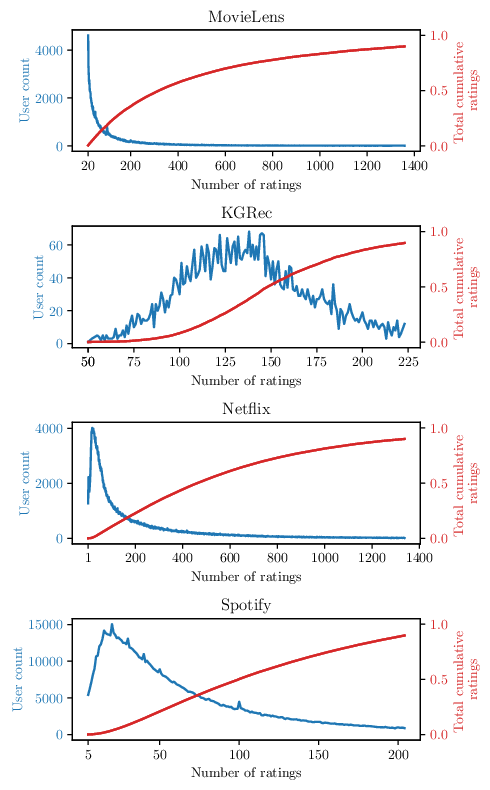

In [51]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


fig, axs = plt.subplots(4, 1, figsize=(5, 8), dpi=100)

mass_to_show = 0.9

datasets = [
    ('MovieLens' , datasets_users_by_rating['MovieLens']),
    ('KGRec', datasets_users_by_rating['KGRec']),
    ('Netflix', datasets_users_by_rating['Netflix']),
    ('Spotify', datasets_users_by_rating['Spotify']),
]

datasets_ticks_y1 = {
    'MovieLens': [0, 2000, 4000],
    'KGRec': [0, 20, 40, 60],
    'Netflix': [0, 2000, 4000],
    'Spotify': [0, 5000, 10000, 15000],
}

datasets_ticks_x = {
    'MovieLens': list(range(0, 1401, 200)),
    'KGRec': list(range(0, 226, 25)),
    'Netflix': list(range(0, 1401, 200)),
    'Spotify': list(range(0, 201, 50)),
}

y_ax_padding = 0.05

for i, (dataset_name, dataset) in enumerate(datasets):
    # netflix_num_users_by_rating.plot.line(ax=axs[0], x='rating_count_norm', y='mass', color='red', label='Netflix')

    lower_mass = dataset[dataset['mass'] < mass_to_show]

    ax1 = axs[i]
    ax2 = axs[i].twinx()

    color_ax1 = 'tab:blue'
    color_ax2 = 'tab:red'

    axs[i].set_title(dataset_name, fontsize=12)

    sns.lineplot(x='rating_count', y='num_users', data=lower_mass, ax=ax1, color=color_ax1, legend=False)
    sns.lineplot(x='rating_count', y='mass', data=lower_mass, ax=ax2, color=color_ax2, legend=False)

    # AXIS X
    ax1.set_xlabel('Number of ratings')
    ticksx = datasets_ticks_x[dataset_name]
    ticksx[0] = dataset['rating_count'].min()
    ax1.set_xticks(ticksx, ticksx, rotation=0)

    # AXIS Y1
    ax1.set_ylabel('User count', color=color_ax1)  # we already handled the x-label with ax1
    ax1.tick_params(axis='y', labelcolor=color_ax1)
    ticksy = datasets_ticks_y1[dataset_name]
    ax1.set_yticks(ticksy, ticksy, rotation=0)

    user_count_min = dataset['num_users'].min()
    user_count_max = dataset['num_users'].max()
    new_min_limit = user_count_min - (user_count_max - user_count_min) * y_ax_padding
    new_max_limit = user_count_max + (user_count_max - user_count_min) * y_ax_padding
    ax1.set_ylim(new_min_limit, new_max_limit)

    dataset_min = dataset['rating_count'].min()
    # ax1.axvline(x=dataset_min, color='black', linestyle='--', linewidth=0.5)
    
    # AXIS Y2
    lower_mass.plot.line(ax=ax2, x='rating_count', y='mass', color=color_ax2, legend=False)
    ax2.set_ylabel('Total cumulative \n ratings', color=color_ax2)
    ax2.tick_params(axis='y', labelcolor=color_ax2)
    ax2.set_ylim(-y_ax_padding, 1 + y_ax_padding)

plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')

/var/folders/fd/cm_96tld2tx10xr416m6z27m0000gq/T/ipykernel_26445/339510636.py:66: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


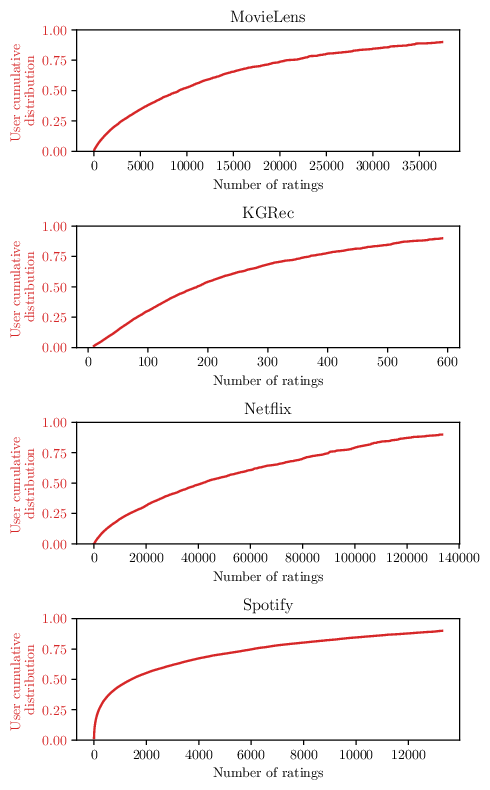

In [223]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


fig, axs = plt.subplots(4, 1, figsize=(5, 8), dpi=100)

mass_to_show = 0.9

datasets = [
    ('MovieLens' , datasets_items_by_rating['MovieLens']),
    ('KGRec', datasets_items_by_rating['KGRec']),
    ('Netflix', datasets_items_by_rating['Netflix']),
    ('Spotify', datasets_items_by_rating['Spotify']),
]

for i, (dataset_name, dataset) in enumerate(datasets):
    # netflix_num_users_by_rating.plot.line(ax=axs[0], x='rating_count_norm', y='mass', color='red', label='Netflix')
    lower_mass = dataset[dataset['mass'] < mass_to_show]
    mass_left = dataset['mass'].ge(0.159).idxmax()
    mass_right = dataset['mass'].ge(0.841).idxmax()

    color = 'tab:blue'
    ax1 = axs[i]
    color = 'tab:red'
    lower_mass.plot.line(ax=ax1, x='rating_count', y='mass', color=color, legend=False)
    sns.lineplot(x='rating_count', y='mass', data=lower_mass, ax=ax2, color=color, legend=False)
    # ax2.set_ylabel('Cumulative dis. \n of number of users', color=color)  # we already handled the x-label with ax1
    ax1.set_ylabel('User cumulative \ndistribution', color=color)  # we already handled the x-label with ax1
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(0, 1)

    # ax1.set_xlabel('Number of ratings')
    ax1.set_xlabel('Number of ratings')
    # for j in range(1):
    # axs[i].axvline(x=lower_mass.loc[mass_left]['rating_count'].mean(), color='black')
    # axs[i].axvline(x=lower_mass.loc[mass_right]['rating_count'].mean(), color='black')

    # ax1.set_xlabel('Rating count')
    # name subplot on the side
    axs[i].set_title(dataset_name, fontsize=12)

# name the figure
# fig.suptitle('Number of users by rating count')

# # netflix_num_users_by_rating.plot.line(ax=axs[0], x='rating_count_norm', y='mass', color='red', label='Netflix')
# lower_mass_netflix = netflix_num_users_by_rating[netflix_num_users_by_rating['mass'] < mass_to_show]
# lower_mass_netflix.plot.line(ax=axs[0], x='rating_count', y='num_users', color='red', label='Netflix')

# # ml_num_users_by_rating.plot.line(ax=axs[1], x='rating_count', y='num_users', color='blue', label='MovieLens')
# lower_mass_ml = ml_num_users_by_rating[ml_num_users_by_rating['mass'] < mass_to_show]
# lower_mass_ml.plot.line(ax=axs[1], x='rating_count', y='num_users', color='blue', label='MovieLens')

# # kgrec_music_num_users_by_rating.plot.line(ax=axs[2], x='rating_count', y='num_users', color='orange', label='KGRec')
# lower_mass_kgrec = kgrec_music_num_users_by_rating[kgrec_music_num_users_by_rating['mass'] < mass_to_show]
# lower_mass_kgrec.plot.line(ax=axs[2], x='rating_count', y='num_users', color='orange', label='KGRec')

# # spotify_num_users_by_rating.plot.line(ax=axs[3], x='rating_count', y='num_users', color='green', label='Spotify')
# lower_mass_spotify = spotify_num_users_by_rating[spotify_num_users_by_rating['mass'] < mass_to_show]
# lower_mass_spotify.plot.line(ax=axs[3], x='rating_count', y='num_users', color='green', label='Spotify')
plt.tight_layout()
plt.show()
fig.savefig('../figures/num_users_by_rating_count.pgf')